# Importing Packages and Data

In [58]:
""" 
1. Descriptive Statistics: Begin with basic descriptive statistics for each variable 
(Stock Index, Short Term Yield, and Long Term Yield for both US and UK). This includes:
    Mean: Average value.
    Median: The middle value.
    Mode: The most frequent value.
    Standard Deviation: Measure of the dispersion or spread of the data.
    Minimum and Maximum values.
    Range: The difference between the maximum and minimum.
    Skewness: Measure of the asymmetry of the probability distribution.
    Kurtosis: Measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution.

2. Time Series Analysis: If your data is a time series (i.e., data points indexed in time order):
    Plot each time series to visually inspect trends, seasonal patterns, and outliers.
    Analyze for stationarity. Non-stationary time series data often need to be transformed, for example, using differencing.
    Autocorrelation and Partial Autocorrelation Analysis to understand the relationship of a variable with its past values.

3. Comparative Analysis: Compare the statistics and time series plots between the US and UK. Look for:
    Correlations between the same variables across countries (e.g., US Stock Index vs. UK Stock Index).
    Correlations between different variables within the same country (e.g., Stock Index vs. Short Term Yield in the US).

4. Yield Curve Analysis: Compare short-term and long-term yields to understand the yield curve for each country, 
    which can be an indicator of economic expectations.
5. Volatility Analysis: Evaluate the volatility in the Stock Index and Yields. This could involve calculating the variance or 
    standard deviation over a rolling window.

6. Event Analysis: Investigate how specific events (like economic announcements, policy changes, etc.) impacted these variables. 
    This could involve a before-and-after analysis for event dates.

7. Regression Analysis: Perform regression analysis to understand the relationship between different variables. For example, 
    how does the Stock Index relate to Short Term and Long Term Yields?

8. Hypothesis Testing: If you have specific hypotheses (e.g., "Short Term Yields are more volatile than Long Term Yields"), 
    you can use statistical tests to validate them.

9. Report Confidence Intervals or Error Margins: When reporting averages or changes, include confidence intervals or error margins to 
    communicate the precision of your estimates.
    
10. Granger Causality Test: To see if one time series can predict another time series. For instance, whether changes in Short Term Yield 
can predict changes in the Stock Index.

"""

' \n1. Descriptive Statistics: Begin with basic descriptive statistics for each variable \n(Stock Index, Short Term Yield, and Long Term Yield for both US and UK). This includes:\n    Mean: Average value.\n    Median: The middle value.\n    Mode: The most frequent value.\n    Standard Deviation: Measure of the dispersion or spread of the data.\n    Minimum and Maximum values.\n    Range: The difference between the maximum and minimum.\n    Skewness: Measure of the asymmetry of the probability distribution.\n    Kurtosis: Measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution.\n\n2. Time Series Analysis: If your data is a time series (i.e., data points indexed in time order):\n    Plot each time series to visually inspect trends, seasonal patterns, and outliers.\n    Analyze for stationarity. Non-stationary time series data often need to be transformed, for example, using differencing.\n    Autocorrelation and Partial Autocorrelation Analysis to u

In [87]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import scipy 

In [60]:
us_data_path = '/Users/talhajamal/Documents/Documents/Imperial/Courses/Semester 2/Empirical Finance/IndividualProject/coursework_1/Data_coursework_1.xlsx'
us_data = pd.read_excel(us_data_path, sheet_name='US')
us_data['Date'] = pd.to_datetime(us_data['Date'], dayfirst=True)
us_data

,Date,Stock Index,Short-term Yield,Long-term Yield
0,1792-01-31,2.348990,3.956,3.956
1,1792-02-29,2.496140,4.198,4.198
2,1792-03-31,2.297596,4.940,4.940
3,1792-04-30,2.350072,5.143,5.143
4,1792-05-31,2.562141,4.557,4.557
...,...,...,...,...
2780,2023-09-30,4507.660000,5.550,4.590
2781,2023-10-31,4288.050000,5.590,4.880
2782,2023-11-30,4193.800000,5.450,4.370
2783,2023-12-31,4567.800000,5.400,3.880


In [61]:
uk_data_path = '/Users/talhajamal/Documents/Documents/Imperial/Courses/Semester 2/Empirical Finance/IndividualProject/coursework_1/Data_coursework_1.xlsx'
uk_data = pd.read_excel(uk_data_path, sheet_name='UK')
uk_data['Date'] = pd.to_datetime(uk_data['Date'], dayfirst=True)
uk_data

,Date,Stock Index,Short-term Yield,Long-term Yield,FX rate
0,1792-01-31,10.312159,3.820,3.213,4.5290
1,1792-02-29,10.842223,3.800,3.121,4.5620
2,1792-03-31,10.952050,3.790,3.109,4.1169
3,1792-04-30,10.451244,3.790,3.230,4.3215
4,1792-05-31,10.358707,3.800,3.213,4.1615
...,...,...,...,...,...
2780,2023-09-30,4127.240000,5.389,4.447,1.2197
2781,2023-10-31,3954.350000,5.338,4.518,1.2152
2782,2023-11-30,4053.800000,5.323,4.176,1.2622
2783,2023-12-31,4232.010000,5.293,3.539,1.2732


# Data Visualization

## Stock Index:
1. Rise in Stock Market started around 70s when the Fiat Currency was perhaps introduced. 
2. Meteoric rise in Stock Market over the last 50 years. 

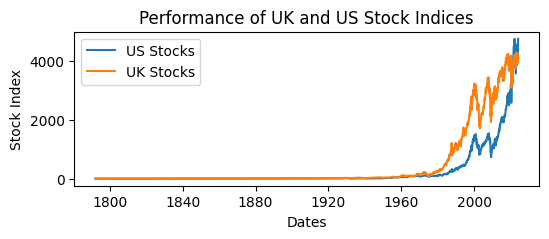

In [62]:
plt.figure(figsize=(6, 2))
plt.plot(us_data['Date'], us_data['Stock Index'], label='US Stocks')
plt.plot(uk_data['Date'], uk_data['Stock Index'], label='UK Stocks')
plt.xlabel('Dates')
plt.ylabel('Stock Index')
plt.title("Performance of UK and US Stock Indices")
plt.legend()
plt.show()

## Short Term Yields:
1. Short Term Yields have largely been flat at around a mean of 3.8% for US and 4.06% for UK. 
2. Rise in Short Term Rates perhaps every time there is an inflationary environment.  
3. A lot more volatility for UK Short Term rates than US Short Term Yields and on average higher than the US.

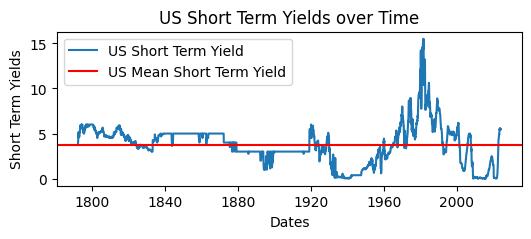

3.779478994901257


In [63]:
plt.figure(figsize=(6, 2))
plt.plot(us_data['Date'], us_data['Short-term Yield'], label='US Short Term Yield')
plt.axhline(np.mean(us_data['Short-term Yield']), color='r', label='US Mean Short Term Yield')
plt.legend()
plt.xlabel('Dates')
plt.ylabel('Short Term Yields')
plt.title('US Short Term Yields over Time')
plt.show()
print(np.mean(us_data['Short-term Yield']))

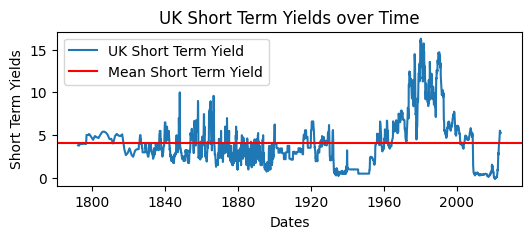

4.062395795332136


In [64]:
plt.figure(figsize=(6, 2))
plt.plot(uk_data['Date'], uk_data['Short-term Yield'], label='UK Short Term Yield')
plt.axhline(np.mean(uk_data['Short-term Yield']), color='r', label='Mean Short Term Yield')
plt.legend()
plt.xlabel('Dates')
plt.ylabel('Short Term Yields')
plt.title('UK Short Term Yields over Time')
plt.show()
print(np.mean(uk_data['Short-term Yield']))

## Long Term Yields:
1. Long Term Yield less volatile than Short Term Yield. 
2. Larger than Short Term Yields mostly because of inherent risk and liquidity premium in longer term treasuries. 
3. Long Term Yields always higher than Short Term Yields
4. Short Term Yields more volatile
5. Short Term Yields almost 'catch up' to Long Term Yields

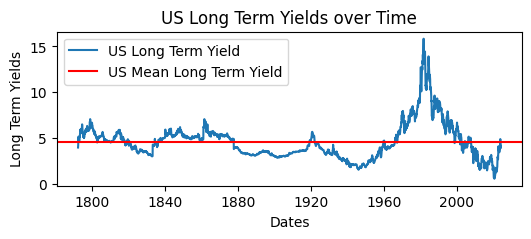

4.577910233393178


In [65]:
plt.figure(figsize=(6, 2))
plt.plot(us_data['Date'], us_data['Long-term Yield'], label='US Long Term Yield')
plt.axhline(np.mean(us_data['Long-term Yield']), color='r', label='US Mean Long Term Yield')
plt.legend()
plt.xlabel('Dates')
plt.ylabel('Long Term Yields')
plt.title('US Long Term Yields over Time')
plt.show()
print(np.mean(us_data['Long-term Yield']))

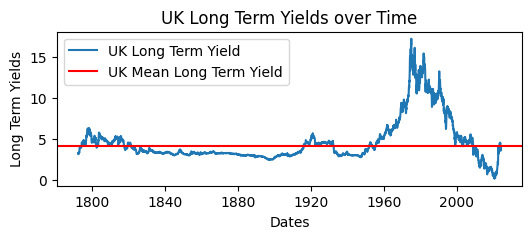

4.58313447037702


In [66]:
plt.figure(figsize=(6, 2))
plt.plot(uk_data['Date'], uk_data['Long-term Yield'], label='UK Long Term Yield')
plt.axhline(np.mean(uk_data['Short-term Yield']), color='r', label='UK Mean Long Term Yield')
plt.legend()
plt.xlabel('Dates')
plt.ylabel('Long Term Yields')
plt.title('UK Long Term Yields over Time')
plt.show()
print(np.mean(uk_data['Long-term Yield']))

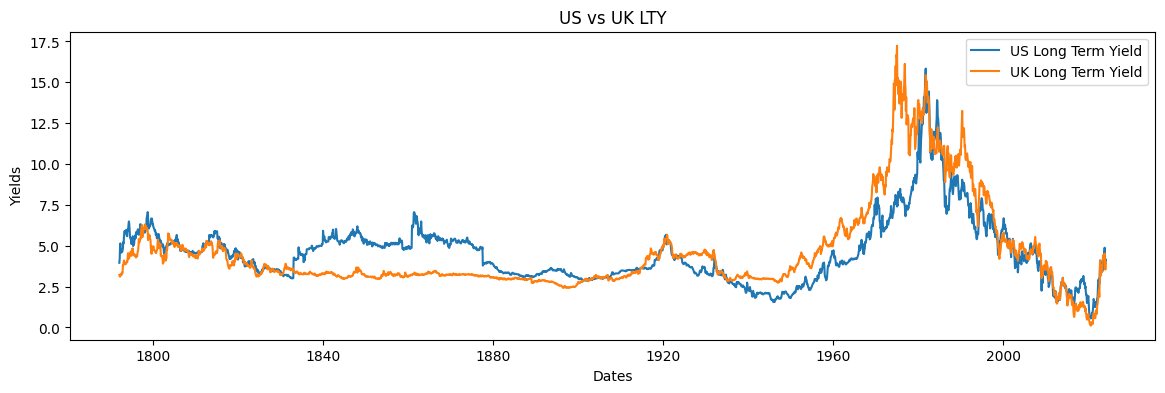

In [67]:
plt.figure(figsize=(14, 4))
plt.plot(us_data['Date'], us_data['Long-term Yield'], label='US Long Term Yield')
plt.plot(uk_data['Date'], uk_data['Long-term Yield'], label='UK Long Term Yield')
plt.xlabel('Dates')
plt.ylabel('Yields')
plt.title("US vs UK LTY")
plt.legend()
plt.show()

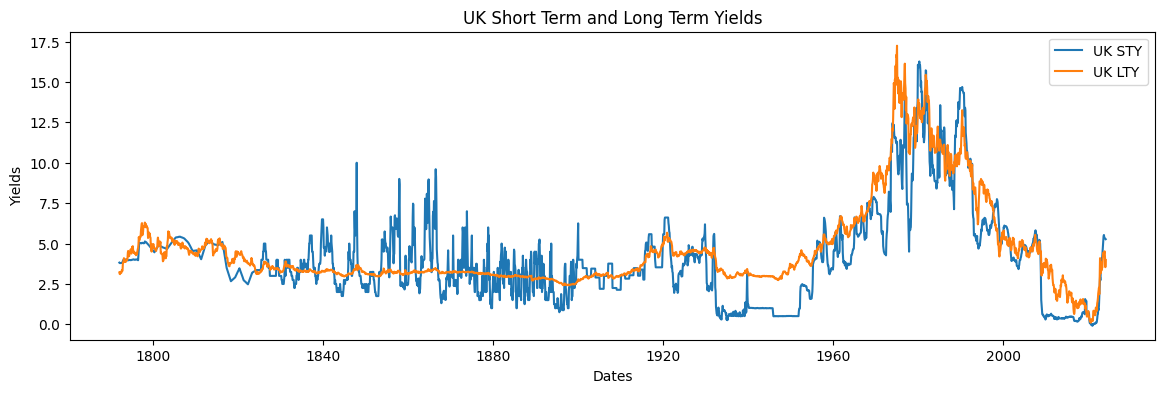

In [68]:
plt.figure(figsize=(14, 4))
plt.plot(uk_data['Date'], uk_data['Short-term Yield'], label='UK STY')
plt.plot(uk_data['Date'], uk_data['Long-term Yield'], label='UK LTY')
plt.xlabel('Dates')
plt.ylabel('Yields')
plt.title("UK Short Term and Long Term Yields")
plt.legend()
plt.show()

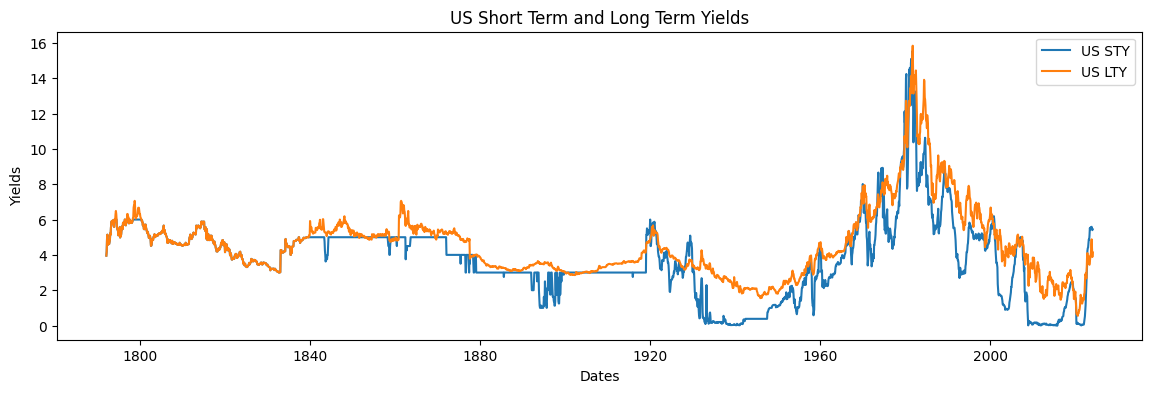

In [69]:
plt.figure(figsize=(14, 4))
plt.plot(us_data['Date'], us_data['Short-term Yield'], label='US STY')
plt.plot(us_data['Date'], us_data['Long-term Yield'], label='US LTY')
plt.xlabel('Dates')
plt.ylabel('Yields')
plt.title("US Short Term and Long Term Yields")
plt.legend()
plt.show()

## Summary Statistics
Find Daily Simple Returns
1. Mean, Median, Standard Deviation, Skewness, Kurtosis, min, max, and first order serial correlation
2. Summary Statistics in % per annum
3. Histogram of returns
4. Variance Coviariance Matrix

find Daily Log Returns
1. Mean, Median, Standard Deviation, Skewness, Kurtosis, min, max, and first order serial correlation
2. Summary Statistics in % per annum
3. Histogram of returns
4. Variance Coviariance Matrix
5. Scatter Plot between log and simple returns


In [90]:
# Summary Statistics for US Data
us_data["Simple Returns"] = us_data['Stock Index'].pct_change()
us_data["Log Returns"] = np.log(us_data['Stock Index'] / us_data['Stock Index'].shift(1))
us_data.dropna(inplace=True)
# Summary Statistics for UK Data
uk_data["Simple Returns"] = uk_data['Stock Index'].pct_change()
uk_data["Log Returns"] = np.log(uk_data['Stock Index'] / uk_data['Stock Index'].shift(1))
uk_data.dropna(inplace=True)

In [91]:
us_sum_stats = pd.DataFrame({
    'mean': [np.mean(us_data['Simple Returns'])],
    'median': [np.median(us_data['Simple Returns'])],
    'sd': [np.std(us_data['Simple Returns'])],
    'skewness':[stats.skew(us_data['Simple Returns'])],
    'kurtosis':[stats.kurtosis(us_data['Simple Returns'])],
    'min' : min(us_data['Simple Returns']),
    'max' : max(us_data['Simple Returns'])
})

us_sum_stats


,mean,median,sd,skewness,kurtosis,min,max
0,0.003672,0.002542,0.043147,0.212897,11.018799,-0.29973,0.422413


In [92]:
uk_sum_stats = pd.DataFrame({
    'mean': [np.mean(uk_data['Simple Returns'])],
    'median': [np.median(uk_data['Simple Returns'])],
    'sd': [np.std(uk_data['Simple Returns'])],
    'skewness':[stats.skew(uk_data['Simple Returns'])],
    'kurtosis':[stats.kurtosis(uk_data['Simple Returns'])],
    'min' : min(uk_data['Simple Returns']),
    'max' : max(uk_data['Simple Returns'])
})

uk_sum_stats


,mean,median,sd,skewness,kurtosis,min,max
0,0.002724,0.002449,0.034003,0.945996,25.682217,-0.265996,0.526835


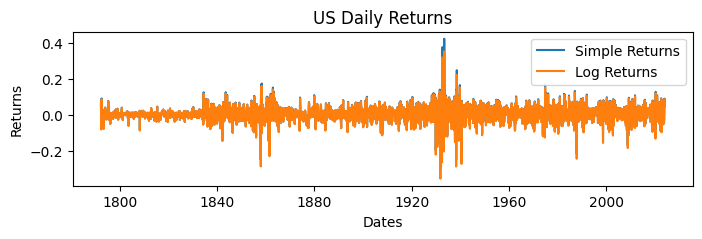

In [98]:
# Plot US Returns
plt.figure(figsize=(8, 2))
plt.plot(us_data['Date'], us_data['Simple Returns'], label='Simple Returns')
plt.plot(us_data['Date'], us_data['Log Returns'], label='Log Returns')
plt.legend()
plt.xlabel('Dates')
plt.ylabel('Returns')
plt.title('US Daily Returns')
plt.show()

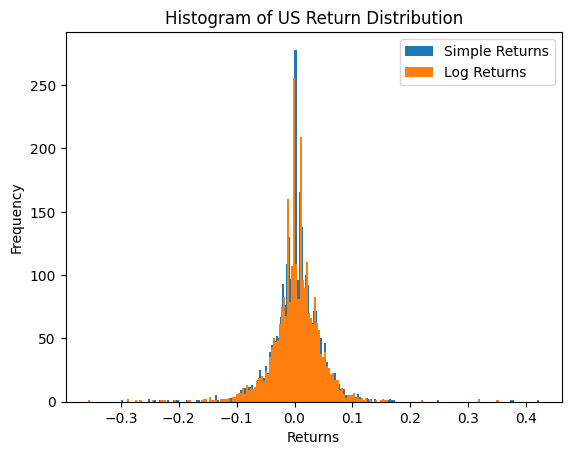

In [105]:
# Histogram of Returns
plt.hist(us_data['Simple Returns'], bins=200, label='Simple Returns');
plt.hist(us_data['Log Returns'], bins=200, label='Log Returns');
plt.legend();
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.title('Histogram of US Return Distribution')
plt.show()

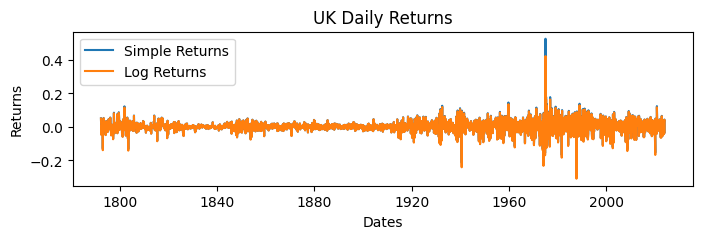

In [106]:
# Plot US Returns
plt.figure(figsize=(8, 2))
plt.plot(uk_data['Date'], uk_data['Simple Returns'], label='Simple Returns')
plt.plot(uk_data['Date'], uk_data['Log Returns'], label='Log Returns')
plt.legend()
plt.xlabel('Dates')
plt.ylabel('Returns')
plt.title('UK Daily Returns')
plt.show()

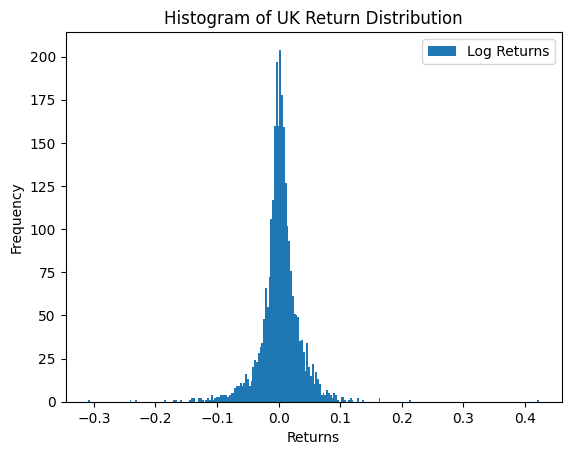

In [111]:
# Histogram of Returns
#plt.hist(uk_data['Simple Returns'], bins=200, label='Simple Returns');
plt.hist(uk_data['Log Returns'], bins=250, label='Log Returns');
plt.legend();
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.title('Histogram of UK Return Distribution')
plt.show()

## Auto-Correlation and Partial Auto-correlation Analysis

In [ ]:
us_data

,Date,Stock Index,Short-term Yield,Long-term Yield
0,1792-01-31,2.348990,3.956,3.956
1,1792-02-29,2.496140,4.198,4.198
2,1792-03-31,2.297596,4.940,4.940
3,1792-04-30,2.350072,5.143,5.143
4,1792-05-31,2.562141,4.557,4.557
...,...,...,...,...
2780,2023-09-30,4507.660000,5.550,4.590
2781,2023-10-31,4288.050000,5.590,4.880
2782,2023-11-30,4193.800000,5.450,4.370
2783,2023-12-31,4567.800000,5.400,3.880


In [ ]:
uk_data

,Date,Stock Index,Short-term Yield,Long-term Yield,FX rate
0,1792-01-31,10.312159,3.820,3.213,4.5290
1,1792-02-29,10.842223,3.800,3.121,4.5620
2,1792-03-31,10.952050,3.790,3.109,4.1169
3,1792-04-30,10.451244,3.790,3.230,4.3215
4,1792-05-31,10.358707,3.800,3.213,4.1615
...,...,...,...,...,...
2780,2023-09-30,4127.240000,5.389,4.447,1.2197
2781,2023-10-31,3954.350000,5.338,4.518,1.2152
2782,2023-11-30,4053.800000,5.323,4.176,1.2622
2783,2023-12-31,4232.010000,5.293,3.539,1.2732


## GBP-USD Rates

In [ ]:
import yfinance as yf 
